# Import Modules

In [1]:
from PIL import Image
from IPython.display import display
import cv2
import numpy as np

# Load Data

In [2]:
# List to store the images
image_list = []

# File paths of your .jpg images
image_paths = ["images/1.jpg", "images/2.jpg"]

# Load images into the list
for path in image_paths:
    image = Image.open(path)
    image_list.append(image)

# Display Images

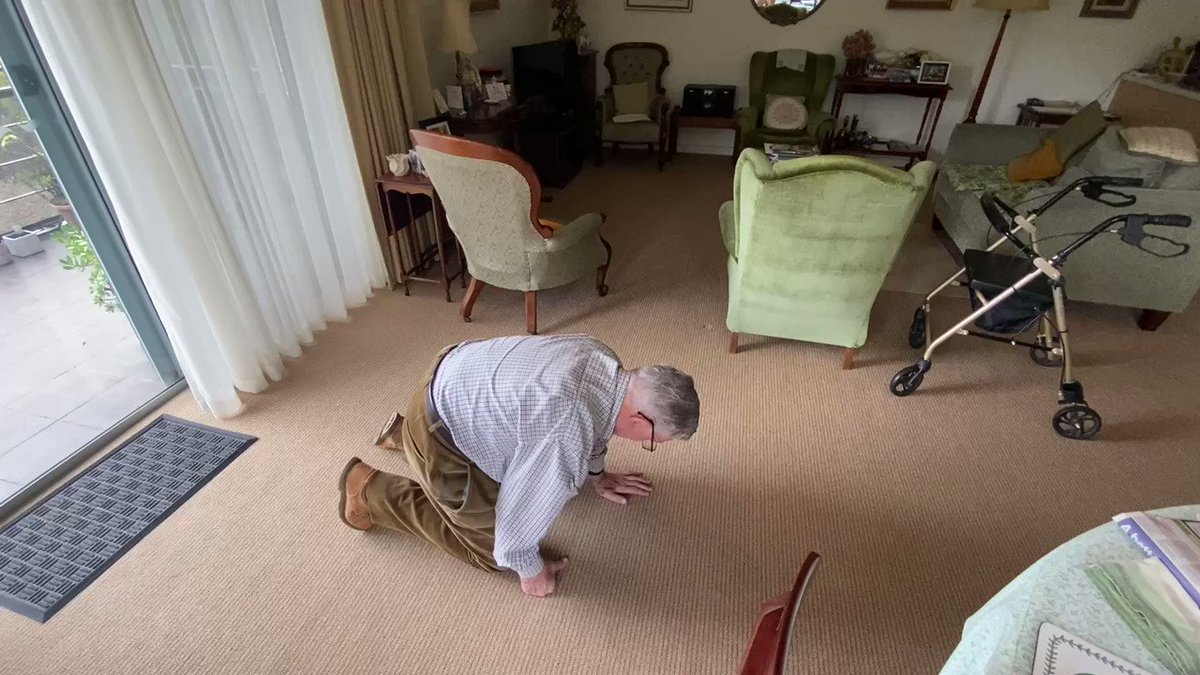

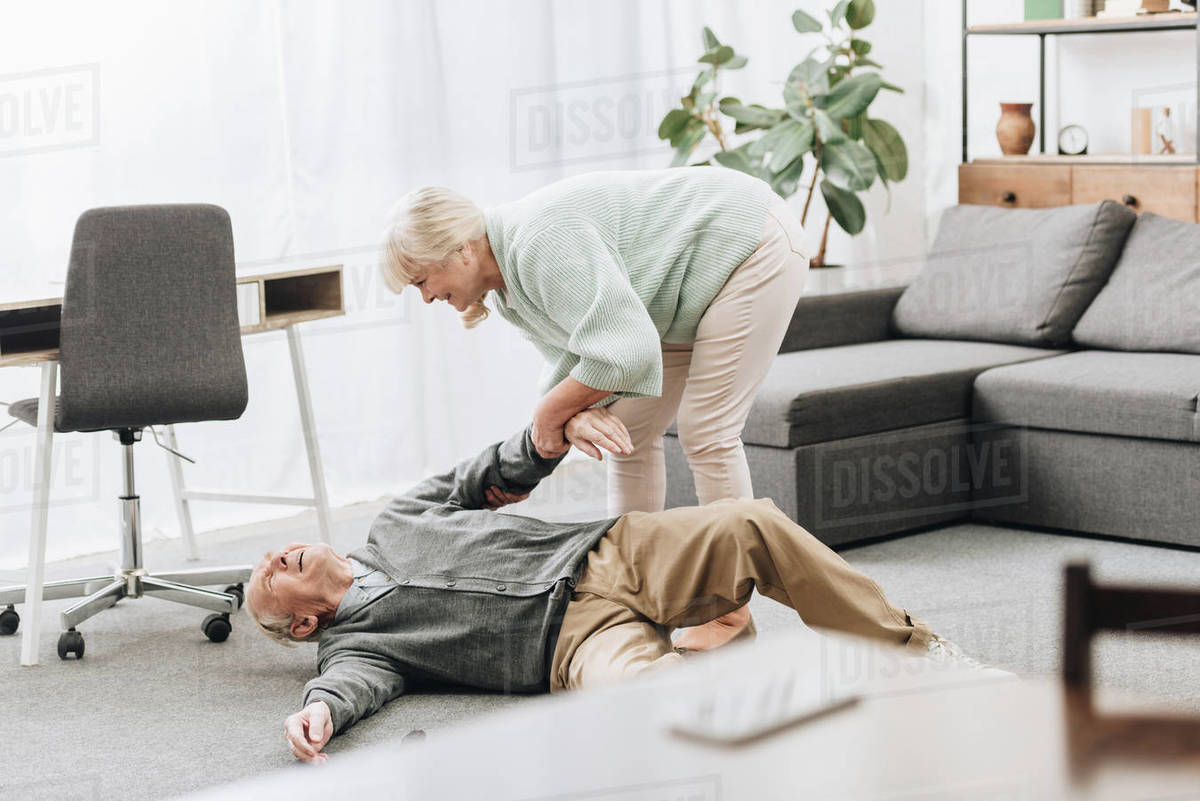

In [3]:
for image in image_list:
    display(image)

# Experiments

## Experiment B - OpenCV Floor Detection

This approach tries to find edges in the image and draws them, it does not work well.

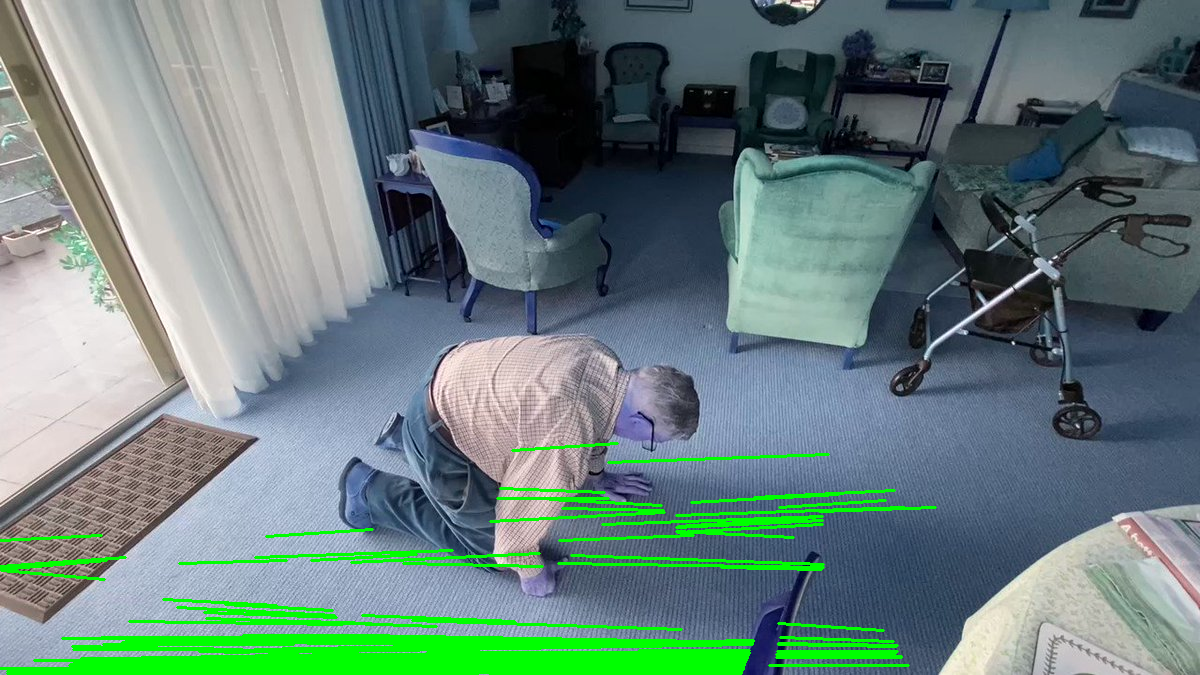

In [9]:
import cv2
import numpy as np

def detect_floor(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

    # Iterate over the detected lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Check if the line is approximately horizontal
            if abs(y2 - y1) < 10:
                # Draw the line
                cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the result
    img = Image.fromarray(img)
    display(img)

# Replace 'your_image_path.jpg' with the path to your image file
detect_floor('images/1.jpg')

The approach below tries to find the contours in the image, the largest contour is seen around the window. It does not really work.

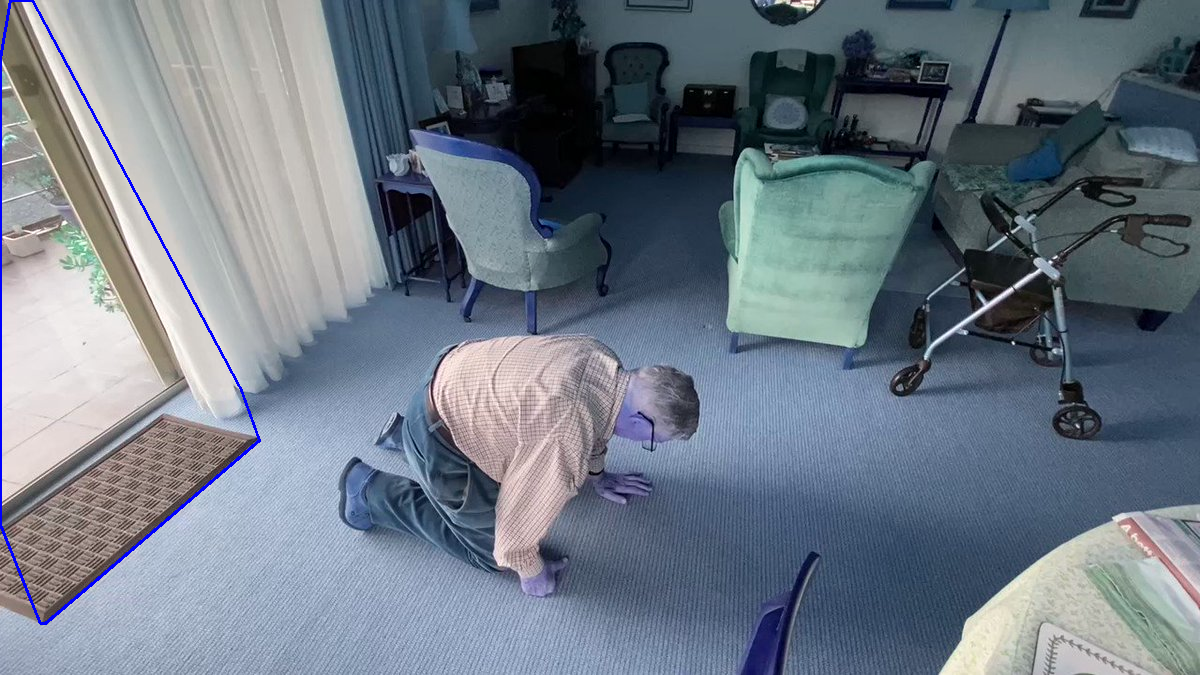

In [19]:
def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 6)
    img_canny = cv2.Canny(img_blur, 119, 175)
    kernel = np.ones((9, 3))
    img_dilate = cv2.dilate(img_canny, kernel, iterations=7)
    return cv2.erode(img_dilate, kernel, iterations=7)

img = cv2.imread("images/1.jpg")
contours = cv2.findContours(process(img), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[0]
cnt = sorted(contours, key=cv2.contourArea)[-1]
cv2.drawContours(img, [cv2.convexHull(cnt)], -1, (0, 0, 255), 2)

# Display the result
img = Image.fromarray(img)
display(img)

# Experiment H - People Detector + Angle of Bounding Box

Terrible!

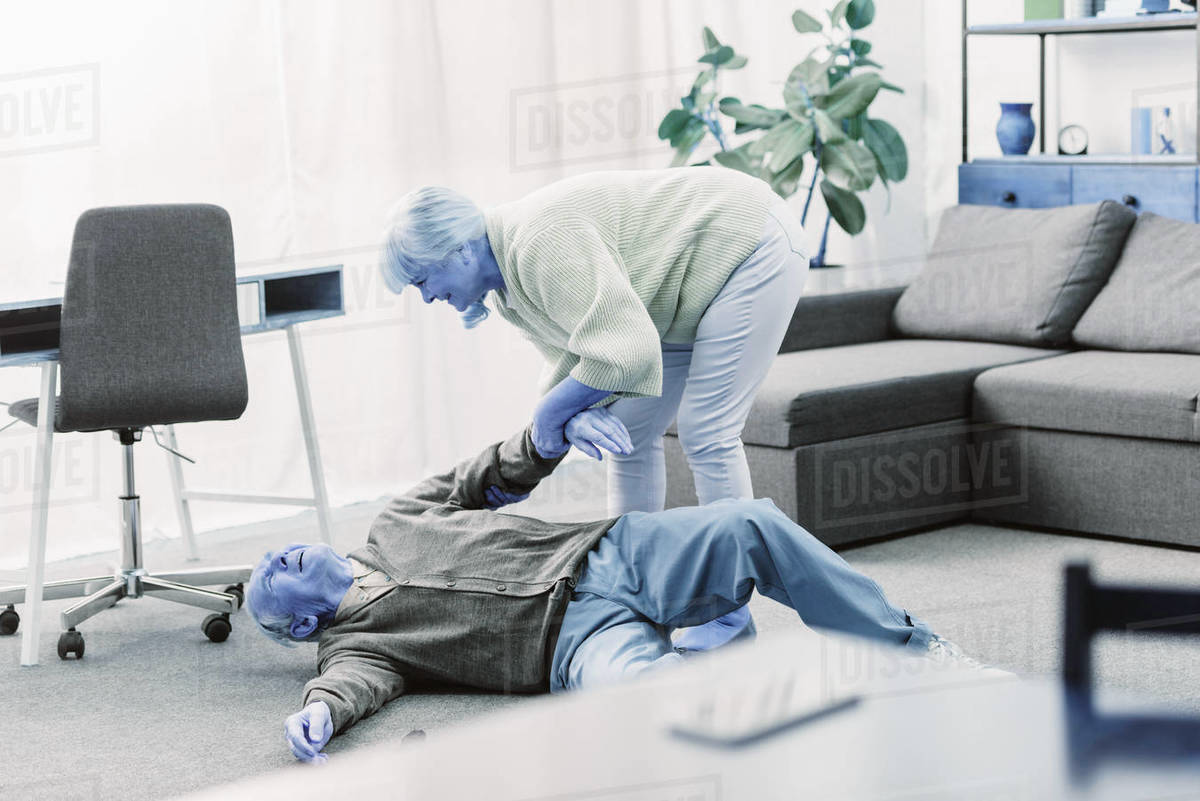

In [26]:
# Load the HOG detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Read the input image
image = cv2.imread('images/2.jpg')

# Detect people in the image
boxes, weights = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)

# Draw bounding boxes around detected people
for (x, y, w, h) in boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
img = Image.fromarray(image)
display(img)